In [1]:
#!pip install git+git://github.com:joatom/watchtrain.git

In [2]:
from fastai.vision.all import *
from fastai.test_utils import VerboseCallback

from training.fastai.websocket_logger import WebsocketLogger

In [3]:
mnist_db = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  splitter= RandomSplitter(),
                  get_items=get_image_files,
                  get_y=parent_label)

In [4]:
dls = mnist_db.dataloaders(untar_data(URLs.MNIST), bs=128)

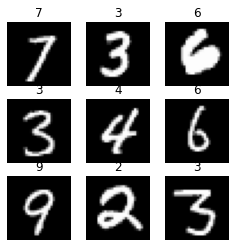

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

Connecting websocket ...
... websocket connected.
Training id : 14


epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,time
0,0.165852,0.155118,0.957357,0.957450,0.958859,00:22
1,0.141980,0.172832,0.955786,0.955629,0.958783,00:21
2,0.100788,0.080553,0.978429,0.978266,0.978884,00:22
3,0.065228,0.086018,0.977786,0.978420,0.978321,00:21
4,0.041476,0.043363,0.988571,0.988494,0.988538,00:22
5,0.032776,0.037434,0.990357,0.990282,0.990426,00:22
6,0.018040,0.024405,0.992786,0.992690,0.992773,00:22
7,0.008909,0.019391,0.994786,0.994714,0.994784,00:22
8,0.004877,0.018727,0.995286,0.995275,0.995255,00:22
9,0.003498,0.018831,0.995643,0.995632,0.995614,00:22


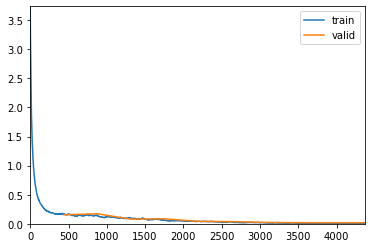

In [23]:
learn = cnn_learner(dls, resnet18, pretrained = False, metrics=[accuracy, Recall(average='macro'), Precision(average='macro')])
learn.unfreeze
learn.fit_one_cycle(10, lr_max = 5e-3, cbs=[ShowGraphCallback(), WebsocketLogger('ws://maichine:8555/ws/watchtrain/producer/99879')])

#### 